In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import os.path as path
import itertools
from sklearn.model_selection import train_test_split

In [2]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Input,InputLayer, Dense, Activation, BatchNormalization, Flatten, Conv2D
from tensorflow.keras.layers import MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint,LearningRateScheduler, \
                                        EarlyStopping
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from  tensorflow.keras.datasets import mnist

In [5]:
os.environ['CUDA_VISIBLE_DEVICES'] = '2'

In [4]:
data = mnist.load_data(path='mnist.npz')

In [5]:
x_data = data[0][0][:,:,:,np.newaxis]
y_data = data[0][1]
x_test = data[1][0][:,:,:,np.newaxis]
y_test = data[1][1]

In [6]:
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.33, random_state=42, stratify=y_data)
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((40200, 28, 28, 1),
 (40200, 10),
 (19800, 28, 28, 1),
 (19800, 10),
 (10000, 28, 28, 1),
 (10000, 10))

In [7]:
y_list = np.unique(data[1][1])
y_list

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [8]:
input_shape = x_test[0].shape
output_size = y_list.shape[0]

In [9]:
def build_2d_cnn_custom_ch_16_DO(conv_num=1):
    input_layer = Input(shape=input_shape)
    x = input_layer

    for i in range(conv_num):
        x = Conv2D(kernel_size=3, filters=16*(2**(i//2)), strides=(1,1), padding='same')(x)
#         x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = MaxPooling2D(pool_size=2, strides=(2,2), padding='same')(x)

    x = Flatten()(x)
  
    x = Dropout(0.75)(x)
    output_layer = Dense(output_size, activation='softmax')(x)
    
    model = Model(inputs=input_layer, outputs=output_layer)
    
    return model

In [10]:
for i in range(1, 6):
    model = build_2d_cnn_custom_ch_16_DO(conv_num=i)
    model.summary()
    del model

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dropout (Dropout)    

Train on 40200 samples, validate on 19800 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/500
39872/40200 [============================>.] - ETA: 0s - loss: 10.6849 - acc: 0.3035
Epoch 00001: val_loss improved from inf to 4.55475, saving model to model/checkpoint/vis_2D_CNN_custom_ch_16_DO_075_DO_1_conv_checkpoint/001-4.5548.hdf5
40200/40200 [==============================] - 6s 145us/sample - loss: 10.6664 - acc: 0.3048 - val_loss: 4.5548 - val_acc: 0.6911
Epoch 2/500
39552/40200 [============================>.] - ETA: 0s - loss: 6.2695 - acc: 0.5766
Epoch 00002: val_loss improved from 4.55475 to 2.46595, saving model to model/checkpoint/vis_2D_CNN_custom_ch_16_DO_075_DO_1_conv_checkpoint/002-2.4659.hdf5
40200/40200 [==============================] - 4s 89us/sample - loss: 6.2464 - acc: 0.5780 - val_loss: 2.4659 - val_acc: 0.8185
Epoch 3/500
40128/40200 [============================>.] - ETA: 0s - loss: 4.3211 - acc: 0.6994
Epoch 00003: val_loss improved from 2.46595 t

Epoch 22/500
40000/40200 [============================>.] - ETA: 0s - loss: 0.4685 - acc: 0.9230
Epoch 00022: val_loss improved from 0.20847 to 0.17064, saving model to model/checkpoint/vis_2D_CNN_custom_ch_16_DO_075_DO_1_conv_checkpoint/022-0.1706.hdf5
40200/40200 [==============================] - 4s 93us/sample - loss: 0.4691 - acc: 0.9228 - val_loss: 0.1706 - val_acc: 0.9687
Epoch 23/500
40000/40200 [============================>.] - ETA: 0s - loss: 0.4015 - acc: 0.9200
Epoch 00023: val_loss improved from 0.17064 to 0.14714, saving model to model/checkpoint/vis_2D_CNN_custom_ch_16_DO_075_DO_1_conv_checkpoint/023-0.1471.hdf5
40200/40200 [==============================] - 4s 92us/sample - loss: 0.4014 - acc: 0.9200 - val_loss: 0.1471 - val_acc: 0.9684
Epoch 24/500
39808/40200 [============================>.] - ETA: 0s - loss: 0.3394 - acc: 0.9230
Epoch 00024: val_loss improved from 0.14714 to 0.13161, saving model to model/checkpoint/vis_2D_CNN_custom_ch_16_DO_075_DO_1_conv_checkpoin

Epoch 44/500
39872/40200 [============================>.] - ETA: 0s - loss: 0.1510 - acc: 0.9525
Epoch 00044: val_loss improved from 0.07448 to 0.07344, saving model to model/checkpoint/vis_2D_CNN_custom_ch_16_DO_075_DO_1_conv_checkpoint/044-0.0734.hdf5
40200/40200 [==============================] - 4s 92us/sample - loss: 0.1515 - acc: 0.9525 - val_loss: 0.0734 - val_acc: 0.9779
Epoch 45/500
40128/40200 [============================>.] - ETA: 0s - loss: 0.1433 - acc: 0.9559
Epoch 00045: val_loss improved from 0.07344 to 0.07312, saving model to model/checkpoint/vis_2D_CNN_custom_ch_16_DO_075_DO_1_conv_checkpoint/045-0.0731.hdf5
40200/40200 [==============================] - 4s 93us/sample - loss: 0.1432 - acc: 0.9559 - val_loss: 0.0731 - val_acc: 0.9786
Epoch 46/500
40192/40200 [============================>.] - ETA: 0s - loss: 0.1467 - acc: 0.9558
Epoch 00046: val_loss did not improve from 0.07312
40200/40200 [==============================] - 4s 93us/sample - loss: 0.1466 - acc: 0.95

40000/40200 [============================>.] - ETA: 0s - loss: 0.1190 - acc: 0.9631
Epoch 00094: val_loss improved from 0.06459 to 0.06456, saving model to model/checkpoint/vis_2D_CNN_custom_ch_16_DO_075_DO_1_conv_checkpoint/094-0.0646.hdf5
40200/40200 [==============================] - 4s 93us/sample - loss: 0.1193 - acc: 0.9629 - val_loss: 0.0646 - val_acc: 0.9812
Epoch 95/500
39680/40200 [============================>.] - ETA: 0s - loss: 0.1236 - acc: 0.9607
Epoch 00095: val_loss improved from 0.06456 to 0.06385, saving model to model/checkpoint/vis_2D_CNN_custom_ch_16_DO_075_DO_1_conv_checkpoint/095-0.0638.hdf5
40200/40200 [==============================] - 4s 93us/sample - loss: 0.1242 - acc: 0.9606 - val_loss: 0.0638 - val_acc: 0.9815
Epoch 96/500
40128/40200 [============================>.] - ETA: 0s - loss: 0.1190 - acc: 0.9625
Epoch 00096: val_loss did not improve from 0.06385
40200/40200 [==============================] - 4s 92us/sample - loss: 0.1191 - acc: 0.9625 - val_loss

Epoch 150/500
40064/40200 [============================>.] - ETA: 0s - loss: 0.1153 - acc: 0.9638
Epoch 00150: val_loss did not improve from 0.06269
40200/40200 [==============================] - 4s 91us/sample - loss: 0.1152 - acc: 0.9637 - val_loss: 0.0630 - val_acc: 0.9814
Epoch 151/500
40064/40200 [============================>.] - ETA: 0s - loss: 0.1154 - acc: 0.9631
Epoch 00151: val_loss did not improve from 0.06269
40200/40200 [==============================] - 4s 92us/sample - loss: 0.1152 - acc: 0.9632 - val_loss: 0.0643 - val_acc: 0.9809
Epoch 152/500
40192/40200 [============================>.] - ETA: 0s - loss: 0.1189 - acc: 0.9622
Epoch 00152: val_loss did not improve from 0.06269
40200/40200 [==============================] - 4s 92us/sample - loss: 0.1189 - acc: 0.9622 - val_loss: 0.0627 - val_acc: 0.9814
Epoch 153/500
39872/40200 [============================>.] - ETA: 0s - loss: 0.1162 - acc: 0.9640
Epoch 00153: val_loss did not improve from 0.06269
40200/40200 [=======

Epoch 179/500
39552/40200 [============================>.] - ETA: 0s - loss: 0.1123 - acc: 0.9640
Epoch 00179: val_loss improved from 0.06230 to 0.06222, saving model to model/checkpoint/vis_2D_CNN_custom_ch_16_DO_075_DO_1_conv_checkpoint/179-0.0622.hdf5
40200/40200 [==============================] - 4s 93us/sample - loss: 0.1125 - acc: 0.9640 - val_loss: 0.0622 - val_acc: 0.9816
Epoch 180/500
39680/40200 [============================>.] - ETA: 0s - loss: 0.1175 - acc: 0.9641
Epoch 00180: val_loss did not improve from 0.06222
40200/40200 [==============================] - 4s 92us/sample - loss: 0.1174 - acc: 0.9640 - val_loss: 0.0626 - val_acc: 0.9815
Epoch 181/500
39808/40200 [============================>.] - ETA: 0s - loss: 0.1164 - acc: 0.9630
Epoch 00181: val_loss did not improve from 0.06222
40200/40200 [==============================] - 4s 93us/sample - loss: 0.1162 - acc: 0.9631 - val_loss: 0.0623 - val_acc: 0.9821
Epoch 182/500
40192/40200 [============================>.] - ET

Epoch 208/500
39616/40200 [============================>.] - ETA: 0s - loss: 0.1106 - acc: 0.9649
Epoch 00208: val_loss did not improve from 0.06151
40200/40200 [==============================] - 4s 92us/sample - loss: 0.1110 - acc: 0.9649 - val_loss: 0.0637 - val_acc: 0.9808
Epoch 209/500
40000/40200 [============================>.] - ETA: 0s - loss: 0.1134 - acc: 0.9632
Epoch 00209: val_loss did not improve from 0.06151
40200/40200 [==============================] - 4s 92us/sample - loss: 0.1132 - acc: 0.9632 - val_loss: 0.0624 - val_acc: 0.9815
Epoch 210/500
39616/40200 [============================>.] - ETA: 0s - loss: 0.1109 - acc: 0.9646
Epoch 00210: val_loss did not improve from 0.06151
40200/40200 [==============================] - 4s 92us/sample - loss: 0.1112 - acc: 0.9645 - val_loss: 0.0622 - val_acc: 0.9815
Epoch 211/500
40064/40200 [============================>.] - ETA: 0s - loss: 0.1159 - acc: 0.9635
Epoch 00211: val_loss did not improve from 0.06151
40200/40200 [=======

Epoch 267/500
39680/40200 [============================>.] - ETA: 0s - loss: 0.1126 - acc: 0.9647
Epoch 00267: val_loss did not improve from 0.06132
40200/40200 [==============================] - 4s 93us/sample - loss: 0.1120 - acc: 0.9648 - val_loss: 0.0621 - val_acc: 0.9814
Epoch 268/500
39552/40200 [============================>.] - ETA: 0s - loss: 0.1106 - acc: 0.9648
Epoch 00268: val_loss did not improve from 0.06132
40200/40200 [==============================] - 4s 92us/sample - loss: 0.1100 - acc: 0.9650 - val_loss: 0.0620 - val_acc: 0.9818
Epoch 269/500
39872/40200 [============================>.] - ETA: 0s - loss: 0.1115 - acc: 0.9651
Epoch 00269: val_loss improved from 0.06132 to 0.06112, saving model to model/checkpoint/vis_2D_CNN_custom_ch_16_DO_075_DO_1_conv_checkpoint/269-0.0611.hdf5
40200/40200 [==============================] - 4s 93us/sample - loss: 0.1115 - acc: 0.9651 - val_loss: 0.0611 - val_acc: 0.9820
Epoch 270/500
39616/40200 [============================>.] - ET

Epoch 296/500
39936/40200 [============================>.] - ETA: 0s - loss: 0.1116 - acc: 0.9647
Epoch 00296: val_loss did not improve from 0.06065
40200/40200 [==============================] - 4s 92us/sample - loss: 0.1116 - acc: 0.9647 - val_loss: 0.0628 - val_acc: 0.9821
Epoch 297/500
39936/40200 [============================>.] - ETA: 0s - loss: 0.1108 - acc: 0.9643
Epoch 00297: val_loss did not improve from 0.06065
40200/40200 [==============================] - 4s 93us/sample - loss: 0.1105 - acc: 0.9644 - val_loss: 0.0626 - val_acc: 0.9814
Epoch 298/500
39552/40200 [============================>.] - ETA: 0s - loss: 0.1094 - acc: 0.9651
Epoch 00298: val_loss did not improve from 0.06065
40200/40200 [==============================] - 4s 92us/sample - loss: 0.1091 - acc: 0.9653 - val_loss: 0.0625 - val_acc: 0.9816
Epoch 299/500
39680/40200 [============================>.] - ETA: 0s - loss: 0.1099 - acc: 0.9647
Epoch 00299: val_loss did not improve from 0.06065
40200/40200 [=======

Epoch 326/500
39744/40200 [============================>.] - ETA: 0s - loss: 0.1093 - acc: 0.9653
Epoch 00326: val_loss did not improve from 0.06065
40200/40200 [==============================] - 4s 92us/sample - loss: 0.1089 - acc: 0.9654 - val_loss: 0.0612 - val_acc: 0.9816
Epoch 327/500
39872/40200 [============================>.] - ETA: 0s - loss: 0.1110 - acc: 0.9641
Epoch 00327: val_loss did not improve from 0.06065
40200/40200 [==============================] - 4s 92us/sample - loss: 0.1109 - acc: 0.9641 - val_loss: 0.0622 - val_acc: 0.9816
Epoch 328/500
39680/40200 [============================>.] - ETA: 0s - loss: 0.1124 - acc: 0.9646
Epoch 00328: val_loss did not improve from 0.06065
40200/40200 [==============================] - 4s 92us/sample - loss: 0.1123 - acc: 0.9646 - val_loss: 0.0618 - val_acc: 0.9820
Epoch 329/500
40064/40200 [============================>.] - ETA: 0s - loss: 0.1064 - acc: 0.9656
Epoch 00329: val_loss did not improve from 0.06065
40200/40200 [=======

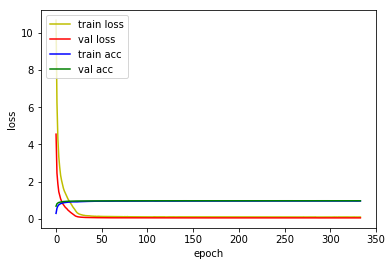

10000/10000 [==============================] - 1s 75us/sample - loss: 0.0625 - acc: 0.9828
Loss: 0.0625295720718801 Accuracy: 0.9828

Train on 40200 samples, validate on 19800 samples
Epoch 1/500
39936/40200 [============================>.] - ETA: 0s - loss: 12.9679 - acc: 0.1675
Epoch 00001: val_loss improved from inf to 7.71543, saving model to model/checkpoint/vis_2D_CNN_custom_ch_16_DO_075_DO_2_conv_checkpoint/001-7.7154.hdf5
40200/40200 [==============================] - 5s 129us/sample - loss: 12.9584 - acc: 0.1680 - val_loss: 7.7154 - val_acc: 0.4546
Epoch 2/500
40128/40200 [============================>.] - ETA: 0s - loss: 9.4805 - acc: 0.3552
Epoch 00002: val_loss improved from 7.71543 to 3.82106, saving model to model/checkpoint/vis_2D_CNN_custom_ch_16_DO_075_DO_2_conv_checkpoint/002-3.8211.hdf5
40200/40200 [==============================] - 4s 102us/sample - loss: 9.4770 - acc: 0.3554 - val_loss: 3.8211 - val_acc: 0.6832
Epoch 3/500
39744/40200 [============================>

Epoch 22/500
40064/40200 [============================>.] - ETA: 0s - loss: 0.3362 - acc: 0.8967
Epoch 00022: val_loss improved from 0.12512 to 0.11822, saving model to model/checkpoint/vis_2D_CNN_custom_ch_16_DO_075_DO_2_conv_checkpoint/022-0.1182.hdf5
40200/40200 [==============================] - 4s 109us/sample - loss: 0.3358 - acc: 0.8968 - val_loss: 0.1182 - val_acc: 0.9619
Epoch 23/500
40192/40200 [============================>.] - ETA: 0s - loss: 0.3198 - acc: 0.9017
Epoch 00023: val_loss improved from 0.11822 to 0.11084, saving model to model/checkpoint/vis_2D_CNN_custom_ch_16_DO_075_DO_2_conv_checkpoint/023-0.1108.hdf5
40200/40200 [==============================] - 4s 109us/sample - loss: 0.3198 - acc: 0.9017 - val_loss: 0.1108 - val_acc: 0.9653
Epoch 24/500
39808/40200 [============================>.] - ETA: 0s - loss: 0.3109 - acc: 0.9054
Epoch 00024: val_loss improved from 0.11084 to 0.10929, saving model to model/checkpoint/vis_2D_CNN_custom_ch_16_DO_075_DO_2_conv_checkpo

Epoch 44/500
39936/40200 [============================>.] - ETA: 0s - loss: 0.2108 - acc: 0.9338
Epoch 00044: val_loss improved from 0.07288 to 0.06999, saving model to model/checkpoint/vis_2D_CNN_custom_ch_16_DO_075_DO_2_conv_checkpoint/044-0.0700.hdf5
40200/40200 [==============================] - 4s 104us/sample - loss: 0.2103 - acc: 0.9339 - val_loss: 0.0700 - val_acc: 0.9787
Epoch 45/500
40192/40200 [============================>.] - ETA: 0s - loss: 0.2119 - acc: 0.9352
Epoch 00045: val_loss did not improve from 0.06999
40200/40200 [==============================] - 4s 98us/sample - loss: 0.2119 - acc: 0.9352 - val_loss: 0.0730 - val_acc: 0.9773
Epoch 46/500
39616/40200 [============================>.] - ETA: 0s - loss: 0.2099 - acc: 0.9346
Epoch 00046: val_loss improved from 0.06999 to 0.06970, saving model to model/checkpoint/vis_2D_CNN_custom_ch_16_DO_075_DO_2_conv_checkpoint/046-0.0697.hdf5
40200/40200 [==============================] - 4s 108us/sample - loss: 0.2102 - acc: 0.

Epoch 69/500
40192/40200 [============================>.] - ETA: 0s - loss: 0.1751 - acc: 0.9457
Epoch 00069: val_loss did not improve from 0.05904
40200/40200 [==============================] - 4s 109us/sample - loss: 0.1750 - acc: 0.9457 - val_loss: 0.0605 - val_acc: 0.9810
Epoch 70/500
39744/40200 [============================>.] - ETA: 0s - loss: 0.1772 - acc: 0.9446
Epoch 00070: val_loss did not improve from 0.05904
40200/40200 [==============================] - 4s 108us/sample - loss: 0.1767 - acc: 0.9447 - val_loss: 0.0605 - val_acc: 0.9812
Epoch 71/500
39744/40200 [============================>.] - ETA: 0s - loss: 0.1727 - acc: 0.9459
Epoch 00071: val_loss did not improve from 0.05904
40200/40200 [==============================] - 4s 109us/sample - loss: 0.1725 - acc: 0.9460 - val_loss: 0.0606 - val_acc: 0.9807
Epoch 72/500
39680/40200 [============================>.] - ETA: 0s - loss: 0.1752 - acc: 0.9442
Epoch 00072: val_loss did not improve from 0.05904
40200/40200 [========

Epoch 96/500
40000/40200 [============================>.] - ETA: 0s - loss: 0.1541 - acc: 0.9531
Epoch 00096: val_loss improved from 0.05406 to 0.05375, saving model to model/checkpoint/vis_2D_CNN_custom_ch_16_DO_075_DO_2_conv_checkpoint/096-0.0537.hdf5
40200/40200 [==============================] - 4s 109us/sample - loss: 0.1538 - acc: 0.9531 - val_loss: 0.0537 - val_acc: 0.9838
Epoch 97/500
39808/40200 [============================>.] - ETA: 0s - loss: 0.1528 - acc: 0.9530
Epoch 00097: val_loss did not improve from 0.05375
40200/40200 [==============================] - 4s 108us/sample - loss: 0.1533 - acc: 0.9529 - val_loss: 0.0547 - val_acc: 0.9833
Epoch 98/500
40192/40200 [============================>.] - ETA: 0s - loss: 0.1544 - acc: 0.9509
Epoch 00098: val_loss did not improve from 0.05375
40200/40200 [==============================] - 4s 108us/sample - loss: 0.1544 - acc: 0.9508 - val_loss: 0.0546 - val_acc: 0.9839
Epoch 99/500
40064/40200 [============================>.] - ETA

Epoch 150/500
40000/40200 [============================>.] - ETA: 0s - loss: 0.1366 - acc: 0.9566
Epoch 00150: val_loss did not improve from 0.04717
40200/40200 [==============================] - 4s 108us/sample - loss: 0.1366 - acc: 0.9566 - val_loss: 0.0475 - val_acc: 0.9859
Epoch 151/500
39744/40200 [============================>.] - ETA: 0s - loss: 0.1324 - acc: 0.9581
Epoch 00151: val_loss did not improve from 0.04717
40200/40200 [==============================] - 4s 108us/sample - loss: 0.1331 - acc: 0.9579 - val_loss: 0.0479 - val_acc: 0.9852
Epoch 152/500
40128/40200 [============================>.] - ETA: 0s - loss: 0.1357 - acc: 0.9580
Epoch 00152: val_loss did not improve from 0.04717
40200/40200 [==============================] - 4s 107us/sample - loss: 0.1358 - acc: 0.9580 - val_loss: 0.0484 - val_acc: 0.9851
Epoch 153/500
39680/40200 [============================>.] - ETA: 0s - loss: 0.1315 - acc: 0.9588
Epoch 00153: val_loss did not improve from 0.04717
40200/40200 [====

Epoch 205/500
40064/40200 [============================>.] - ETA: 0s - loss: 0.1209 - acc: 0.9615
Epoch 00205: val_loss did not improve from 0.04507
40200/40200 [==============================] - 4s 109us/sample - loss: 0.1206 - acc: 0.9616 - val_loss: 0.0471 - val_acc: 0.9854
Epoch 206/500
39744/40200 [============================>.] - ETA: 0s - loss: 0.1226 - acc: 0.9609
Epoch 00206: val_loss did not improve from 0.04507
40200/40200 [==============================] - 4s 107us/sample - loss: 0.1231 - acc: 0.9609 - val_loss: 0.0458 - val_acc: 0.9858
Epoch 207/500
39872/40200 [============================>.] - ETA: 0s - loss: 0.1193 - acc: 0.9608
Epoch 00207: val_loss did not improve from 0.04507
40200/40200 [==============================] - 4s 109us/sample - loss: 0.1188 - acc: 0.9610 - val_loss: 0.0458 - val_acc: 0.9860
Epoch 208/500
40000/40200 [============================>.] - ETA: 0s - loss: 0.1211 - acc: 0.9616
Epoch 00208: val_loss did not improve from 0.04507
40200/40200 [====

Epoch 262/500
40192/40200 [============================>.] - ETA: 0s - loss: 0.1118 - acc: 0.9653
Epoch 00262: val_loss did not improve from 0.04319
40200/40200 [==============================] - 4s 109us/sample - loss: 0.1118 - acc: 0.9653 - val_loss: 0.0443 - val_acc: 0.9864
Epoch 263/500
39808/40200 [============================>.] - ETA: 0s - loss: 0.1141 - acc: 0.9648
Epoch 00263: val_loss did not improve from 0.04319
40200/40200 [==============================] - 4s 108us/sample - loss: 0.1140 - acc: 0.9647 - val_loss: 0.0443 - val_acc: 0.9863
Epoch 264/500
39680/40200 [============================>.] - ETA: 0s - loss: 0.1144 - acc: 0.9637
Epoch 00264: val_loss did not improve from 0.04319
40200/40200 [==============================] - 4s 108us/sample - loss: 0.1143 - acc: 0.9636 - val_loss: 0.0435 - val_acc: 0.9870
Epoch 265/500
39872/40200 [============================>.] - ETA: 0s - loss: 0.1137 - acc: 0.9640
Epoch 00265: val_loss did not improve from 0.04319
40200/40200 [====

Epoch 290/500
40000/40200 [============================>.] - ETA: 0s - loss: 0.1126 - acc: 0.9629
Epoch 00290: val_loss did not improve from 0.04203
40200/40200 [==============================] - 4s 108us/sample - loss: 0.1124 - acc: 0.9630 - val_loss: 0.0442 - val_acc: 0.9867
Epoch 291/500
39744/40200 [============================>.] - ETA: 0s - loss: 0.1136 - acc: 0.9639
Epoch 00291: val_loss did not improve from 0.04203
40200/40200 [==============================] - 4s 107us/sample - loss: 0.1136 - acc: 0.9639 - val_loss: 0.0434 - val_acc: 0.9866
Epoch 292/500
39744/40200 [============================>.] - ETA: 0s - loss: 0.1145 - acc: 0.9630
Epoch 00292: val_loss did not improve from 0.04203
40200/40200 [==============================] - 4s 108us/sample - loss: 0.1147 - acc: 0.9629 - val_loss: 0.0436 - val_acc: 0.9869
Epoch 293/500
39744/40200 [============================>.] - ETA: 0s - loss: 0.1097 - acc: 0.9654
Epoch 00293: val_loss did not improve from 0.04203
40200/40200 [====

Epoch 320/500
40000/40200 [============================>.] - ETA: 0s - loss: 0.1069 - acc: 0.9661
Epoch 00320: val_loss did not improve from 0.04203
40200/40200 [==============================] - 4s 108us/sample - loss: 0.1069 - acc: 0.9661 - val_loss: 0.0441 - val_acc: 0.9869
Epoch 321/500
40192/40200 [============================>.] - ETA: 0s - loss: 0.1075 - acc: 0.9658
Epoch 00321: val_loss did not improve from 0.04203
40200/40200 [==============================] - 4s 108us/sample - loss: 0.1076 - acc: 0.9657 - val_loss: 0.0438 - val_acc: 0.9864
Epoch 322/500
40000/40200 [============================>.] - ETA: 0s - loss: 0.1084 - acc: 0.9657
Epoch 00322: val_loss did not improve from 0.04203
40200/40200 [==============================] - 4s 109us/sample - loss: 0.1082 - acc: 0.9657 - val_loss: 0.0430 - val_acc: 0.9869
Epoch 323/500
40064/40200 [============================>.] - ETA: 0s - loss: 0.1111 - acc: 0.9648
Epoch 00323: val_loss did not improve from 0.04203
40200/40200 [====

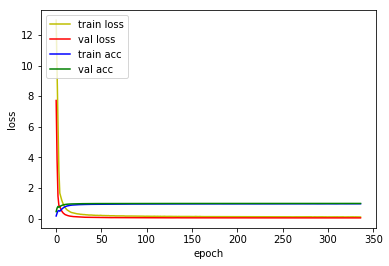

10000/10000 [==============================] - 1s 75us/sample - loss: 0.0361 - acc: 0.9875
Loss: 0.0361479557828512 Accuracy: 0.9875

Train on 40200 samples, validate on 19800 samples
Epoch 1/500
39936/40200 [============================>.] - ETA: 0s - loss: 12.3148 - acc: 0.1750
Epoch 00001: val_loss improved from inf to 5.49217, saving model to model/checkpoint/vis_2D_CNN_custom_ch_16_DO_075_DO_3_conv_checkpoint/001-5.4922.hdf5
40200/40200 [==============================] - 7s 165us/sample - loss: 12.2934 - acc: 0.1756 - val_loss: 5.4922 - val_acc: 0.4748
Epoch 2/500
40128/40200 [============================>.] - ETA: 0s - loss: 3.3479 - acc: 0.3037
Epoch 00002: val_loss improved from 5.49217 to 1.38038, saving model to model/checkpoint/vis_2D_CNN_custom_ch_16_DO_075_DO_3_conv_checkpoint/002-1.3804.hdf5
40200/40200 [==============================] - 5s 129us/sample - loss: 3.3451 - acc: 0.3039 - val_loss: 1.3804 - val_acc: 0.6180
Epoch 3/500
39936/40200 [============================>

Epoch 22/500
40128/40200 [============================>.] - ETA: 0s - loss: 0.2567 - acc: 0.9219
Epoch 00022: val_loss improved from 0.10201 to 0.09584, saving model to model/checkpoint/vis_2D_CNN_custom_ch_16_DO_075_DO_3_conv_checkpoint/022-0.0958.hdf5
40200/40200 [==============================] - 5s 121us/sample - loss: 0.2570 - acc: 0.9219 - val_loss: 0.0958 - val_acc: 0.9709
Epoch 23/500
40000/40200 [============================>.] - ETA: 0s - loss: 0.2469 - acc: 0.9234
Epoch 00023: val_loss did not improve from 0.09584
40200/40200 [==============================] - 5s 119us/sample - loss: 0.2471 - acc: 0.9234 - val_loss: 0.0969 - val_acc: 0.9711
Epoch 24/500
39936/40200 [============================>.] - ETA: 0s - loss: 0.2364 - acc: 0.9268
Epoch 00024: val_loss improved from 0.09584 to 0.09079, saving model to model/checkpoint/vis_2D_CNN_custom_ch_16_DO_075_DO_3_conv_checkpoint/024-0.0908.hdf5
40200/40200 [==============================] - 5s 114us/sample - loss: 0.2361 - acc: 0

Epoch 70/500
40192/40200 [============================>.] - ETA: 0s - loss: 0.1043 - acc: 0.9670
Epoch 00070: val_loss did not improve from 0.04967
40200/40200 [==============================] - 5s 119us/sample - loss: 0.1042 - acc: 0.9670 - val_loss: 0.0512 - val_acc: 0.9845
Epoch 71/500
39872/40200 [============================>.] - ETA: 0s - loss: 0.1034 - acc: 0.9675
Epoch 00071: val_loss did not improve from 0.04967
40200/40200 [==============================] - 5s 116us/sample - loss: 0.1035 - acc: 0.9675 - val_loss: 0.0509 - val_acc: 0.9843
Epoch 72/500
40000/40200 [============================>.] - ETA: 0s - loss: 0.1020 - acc: 0.9676
Epoch 00072: val_loss improved from 0.04967 to 0.04806, saving model to model/checkpoint/vis_2D_CNN_custom_ch_16_DO_075_DO_3_conv_checkpoint/072-0.0481.hdf5
40200/40200 [==============================] - 5s 117us/sample - loss: 0.1019 - acc: 0.9676 - val_loss: 0.0481 - val_acc: 0.9851
Epoch 73/500
39936/40200 [============================>.] - ETA

Epoch 124/500
40064/40200 [============================>.] - ETA: 0s - loss: 0.0751 - acc: 0.9756
Epoch 00124: val_loss did not improve from 0.04119
40200/40200 [==============================] - 5s 116us/sample - loss: 0.0750 - acc: 0.9756 - val_loss: 0.0446 - val_acc: 0.9873
Epoch 125/500
39936/40200 [============================>.] - ETA: 0s - loss: 0.0711 - acc: 0.9771
Epoch 00125: val_loss improved from 0.04119 to 0.04098, saving model to model/checkpoint/vis_2D_CNN_custom_ch_16_DO_075_DO_3_conv_checkpoint/125-0.0410.hdf5
40200/40200 [==============================] - 5s 117us/sample - loss: 0.0709 - acc: 0.9771 - val_loss: 0.0410 - val_acc: 0.9871
Epoch 126/500
39872/40200 [============================>.] - ETA: 0s - loss: 0.0717 - acc: 0.9771
Epoch 00126: val_loss did not improve from 0.04098
40200/40200 [==============================] - 5s 114us/sample - loss: 0.0723 - acc: 0.9770 - val_loss: 0.0418 - val_acc: 0.9877
Epoch 127/500
40128/40200 [============================>.] -

Epoch 152/500
40000/40200 [============================>.] - ETA: 0s - loss: 0.0633 - acc: 0.9798
Epoch 00152: val_loss did not improve from 0.03988
40200/40200 [==============================] - 5s 125us/sample - loss: 0.0640 - acc: 0.9796 - val_loss: 0.0434 - val_acc: 0.9879
Epoch 153/500
39744/40200 [============================>.] - ETA: 0s - loss: 0.0635 - acc: 0.9799
Epoch 00153: val_loss did not improve from 0.03988
40200/40200 [==============================] - 5s 126us/sample - loss: 0.0635 - acc: 0.9799 - val_loss: 0.0416 - val_acc: 0.9878
Epoch 154/500
40000/40200 [============================>.] - ETA: 0s - loss: 0.0632 - acc: 0.9793
Epoch 00154: val_loss did not improve from 0.03988
40200/40200 [==============================] - 5s 125us/sample - loss: 0.0635 - acc: 0.9793 - val_loss: 0.0409 - val_acc: 0.9883
Epoch 155/500
39936/40200 [============================>.] - ETA: 0s - loss: 0.0638 - acc: 0.9799
Epoch 00155: val_loss did not improve from 0.03988
40200/40200 [====

Epoch 210/500
39872/40200 [============================>.] - ETA: 0s - loss: 0.0524 - acc: 0.9825
Epoch 00210: val_loss did not improve from 0.03877
40200/40200 [==============================] - 5s 124us/sample - loss: 0.0522 - acc: 0.9826 - val_loss: 0.0419 - val_acc: 0.9881
Epoch 211/500
39872/40200 [============================>.] - ETA: 0s - loss: 0.0550 - acc: 0.9824
Epoch 00211: val_loss did not improve from 0.03877
40200/40200 [==============================] - 5s 126us/sample - loss: 0.0547 - acc: 0.9825 - val_loss: 0.0406 - val_acc: 0.9888
Epoch 212/500
39872/40200 [============================>.] - ETA: 0s - loss: 0.0529 - acc: 0.9826
Epoch 00212: val_loss did not improve from 0.03877
40200/40200 [==============================] - 5s 122us/sample - loss: 0.0531 - acc: 0.9825 - val_loss: 0.0404 - val_acc: 0.9884
Epoch 213/500
39872/40200 [============================>.] - ETA: 0s - loss: 0.0516 - acc: 0.9831
Epoch 00213: val_loss did not improve from 0.03877
40200/40200 [====

39936/40200 [============================>.] - ETA: 0s - loss: 0.0482 - acc: 0.9845
Epoch 00268: val_loss did not improve from 0.03786
40200/40200 [==============================] - 5s 125us/sample - loss: 0.0483 - acc: 0.9846 - val_loss: 0.0399 - val_acc: 0.9886
Epoch 269/500
39744/40200 [============================>.] - ETA: 0s - loss: 0.0495 - acc: 0.9838
Epoch 00269: val_loss did not improve from 0.03786
40200/40200 [==============================] - 5s 125us/sample - loss: 0.0495 - acc: 0.9838 - val_loss: 0.0405 - val_acc: 0.9885
Epoch 270/500
40000/40200 [============================>.] - ETA: 0s - loss: 0.0468 - acc: 0.9848
Epoch 00270: val_loss did not improve from 0.03786
40200/40200 [==============================] - 5s 125us/sample - loss: 0.0468 - acc: 0.9848 - val_loss: 0.0384 - val_acc: 0.9893
Epoch 271/500
40128/40200 [============================>.] - ETA: 0s - loss: 0.0464 - acc: 0.9845
Epoch 00271: val_loss did not improve from 0.03786
40200/40200 [==================

Epoch 298/500
40128/40200 [============================>.] - ETA: 0s - loss: 0.0468 - acc: 0.9849
Epoch 00298: val_loss did not improve from 0.03786
40200/40200 [==============================] - 5s 126us/sample - loss: 0.0467 - acc: 0.9850 - val_loss: 0.0399 - val_acc: 0.9889
Epoch 299/500
39936/40200 [============================>.] - ETA: 0s - loss: 0.0449 - acc: 0.9851
Epoch 00299: val_loss did not improve from 0.03786
40200/40200 [==============================] - 5s 124us/sample - loss: 0.0448 - acc: 0.9851 - val_loss: 0.0413 - val_acc: 0.9891
Epoch 300/500
39936/40200 [============================>.] - ETA: 0s - loss: 0.0451 - acc: 0.9848
Epoch 00300: val_loss did not improve from 0.03786
40200/40200 [==============================] - 5s 125us/sample - loss: 0.0451 - acc: 0.9848 - val_loss: 0.0411 - val_acc: 0.9887
Epoch 301/500
39872/40200 [============================>.] - ETA: 0s - loss: 0.0473 - acc: 0.9844
Epoch 00301: val_loss did not improve from 0.03786
40200/40200 [====

Epoch 357/500
39808/40200 [============================>.] - ETA: 0s - loss: 0.0433 - acc: 0.9853
Epoch 00357: val_loss did not improve from 0.03758
40200/40200 [==============================] - 5s 125us/sample - loss: 0.0434 - acc: 0.9853 - val_loss: 0.0433 - val_acc: 0.9887

vis_2D_CNN_custom_ch_16_DO_075_DO_3_conv Model


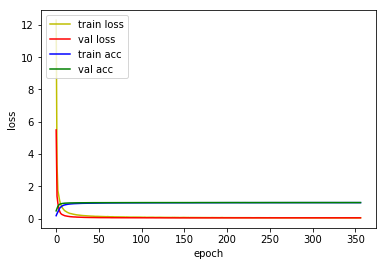

10000/10000 [==============================] - 1s 96us/sample - loss: 0.0316 - acc: 0.9902
Loss: 0.031557436333539954 Accuracy: 0.9902

Train on 40200 samples, validate on 19800 samples
Epoch 1/500
40192/40200 [============================>.] - ETA: 0s - loss: 8.4968 - acc: 0.1652
Epoch 00001: val_loss improved from inf to 1.76053, saving model to model/checkpoint/vis_2D_CNN_custom_ch_16_DO_075_DO_4_conv_checkpoint/001-1.7605.hdf5
40200/40200 [==============================] - 7s 185us/sample - loss: 8.4954 - acc: 0.1652 - val_loss: 1.7605 - val_acc: 0.4536
Epoch 2/500
40192/40200 [============================>.] - ETA: 0s - loss: 1.8937 - acc: 0.3259
Epoch 00002: val_loss improved from 1.76053 to 1.24486, saving model to model/checkpoint/vis_2D_CNN_custom_ch_16_DO_075_DO_4_conv_checkpoint/002-1.2449.hdf5
40200/40200 [==============================] - 6s 143us/sample - loss: 1.8936 - acc: 0.3259 - val_loss: 1.2449 - val_acc: 0.6651
Epoch 3/500
40000/40200 [============================>

39936/40200 [============================>.] - ETA: 0s - loss: 0.1768 - acc: 0.9439
Epoch 00045: val_loss did not improve from 0.06233
40200/40200 [==============================] - 6s 141us/sample - loss: 0.1772 - acc: 0.9438 - val_loss: 0.0639 - val_acc: 0.9819
Epoch 46/500
39872/40200 [============================>.] - ETA: 0s - loss: 0.1826 - acc: 0.9441
Epoch 00046: val_loss did not improve from 0.06233
40200/40200 [==============================] - 6s 139us/sample - loss: 0.1827 - acc: 0.9440 - val_loss: 0.0642 - val_acc: 0.9822
Epoch 47/500
40128/40200 [============================>.] - ETA: 0s - loss: 0.1688 - acc: 0.9478
Epoch 00047: val_loss did not improve from 0.06233
40200/40200 [==============================] - 6s 140us/sample - loss: 0.1689 - acc: 0.9477 - val_loss: 0.0669 - val_acc: 0.9812
Epoch 48/500
39808/40200 [============================>.] - ETA: 0s - loss: 0.1656 - acc: 0.9476
Epoch 00048: val_loss improved from 0.06233 to 0.06180, saving model to model/checkpo

Epoch 72/500
40192/40200 [============================>.] - ETA: 0s - loss: 0.1165 - acc: 0.9632
Epoch 00072: val_loss did not improve from 0.05155
40200/40200 [==============================] - 6s 141us/sample - loss: 0.1165 - acc: 0.9632 - val_loss: 0.0543 - val_acc: 0.9842
Epoch 73/500
40064/40200 [============================>.] - ETA: 0s - loss: 0.1135 - acc: 0.9638
Epoch 00073: val_loss improved from 0.05155 to 0.05046, saving model to model/checkpoint/vis_2D_CNN_custom_ch_16_DO_075_DO_4_conv_checkpoint/073-0.0505.hdf5
40200/40200 [==============================] - 6s 142us/sample - loss: 0.1136 - acc: 0.9638 - val_loss: 0.0505 - val_acc: 0.9854
Epoch 74/500
39872/40200 [============================>.] - ETA: 0s - loss: 0.1103 - acc: 0.9662
Epoch 00074: val_loss did not improve from 0.05046
40200/40200 [==============================] - 6s 140us/sample - loss: 0.1109 - acc: 0.9660 - val_loss: 0.0541 - val_acc: 0.9856
Epoch 75/500
40064/40200 [============================>.] - ETA

40064/40200 [============================>.] - ETA: 0s - loss: 0.0867 - acc: 0.9727
Epoch 00100: val_loss did not improve from 0.04868
40200/40200 [==============================] - 6s 140us/sample - loss: 0.0870 - acc: 0.9727 - val_loss: 0.0550 - val_acc: 0.9870
Epoch 101/500
39808/40200 [============================>.] - ETA: 0s - loss: 0.0897 - acc: 0.9718
Epoch 00101: val_loss improved from 0.04868 to 0.04863, saving model to model/checkpoint/vis_2D_CNN_custom_ch_16_DO_075_DO_4_conv_checkpoint/101-0.0486.hdf5
40200/40200 [==============================] - 6s 142us/sample - loss: 0.0900 - acc: 0.9717 - val_loss: 0.0486 - val_acc: 0.9862
Epoch 102/500
39936/40200 [============================>.] - ETA: 0s - loss: 0.0872 - acc: 0.9718
Epoch 00102: val_loss did not improve from 0.04863
40200/40200 [==============================] - 6s 140us/sample - loss: 0.0869 - acc: 0.9718 - val_loss: 0.0493 - val_acc: 0.9861
Epoch 103/500
40000/40200 [============================>.] - ETA: 0s - los

Epoch 129/500
39872/40200 [============================>.] - ETA: 0s - loss: 0.0709 - acc: 0.9777
Epoch 00129: val_loss did not improve from 0.04727
40200/40200 [==============================] - 6s 139us/sample - loss: 0.0712 - acc: 0.9777 - val_loss: 0.0483 - val_acc: 0.9869
Epoch 130/500
40000/40200 [============================>.] - ETA: 0s - loss: 0.0727 - acc: 0.9769
Epoch 00130: val_loss did not improve from 0.04727
40200/40200 [==============================] - 6s 139us/sample - loss: 0.0726 - acc: 0.9770 - val_loss: 0.0527 - val_acc: 0.9874
Epoch 131/500
40064/40200 [============================>.] - ETA: 0s - loss: 0.0718 - acc: 0.9764
Epoch 00131: val_loss did not improve from 0.04727
40200/40200 [==============================] - 6s 140us/sample - loss: 0.0718 - acc: 0.9764 - val_loss: 0.0522 - val_acc: 0.9873
Epoch 132/500
40128/40200 [============================>.] - ETA: 0s - loss: 0.0692 - acc: 0.9779
Epoch 00132: val_loss did not improve from 0.04727
40200/40200 [====

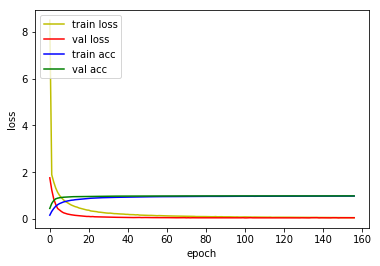

10000/10000 [==============================] - 1s 106us/sample - loss: 0.0354 - acc: 0.9891
Loss: 0.03535740399944334 Accuracy: 0.9891

Train on 40200 samples, validate on 19800 samples
Epoch 1/500
40128/40200 [============================>.] - ETA: 0s - loss: 4.9831 - acc: 0.2565
Epoch 00001: val_loss improved from inf to 1.26036, saving model to model/checkpoint/vis_2D_CNN_custom_ch_16_DO_075_DO_5_conv_checkpoint/001-1.2604.hdf5
40200/40200 [==============================] - 9s 212us/sample - loss: 4.9771 - acc: 0.2569 - val_loss: 1.2604 - val_acc: 0.6588
Epoch 2/500
39936/40200 [============================>.] - ETA: 0s - loss: 1.4214 - acc: 0.5127
Epoch 00002: val_loss improved from 1.26036 to 0.61066, saving model to model/checkpoint/vis_2D_CNN_custom_ch_16_DO_075_DO_5_conv_checkpoint/002-0.6107.hdf5
40200/40200 [==============================] - 6s 157us/sample - loss: 1.4207 - acc: 0.5128 - val_loss: 0.6107 - val_acc: 0.8483
Epoch 3/500
40064/40200 [============================>

Epoch 23/500
40128/40200 [============================>.] - ETA: 0s - loss: 0.1830 - acc: 0.9375
Epoch 00023: val_loss improved from 0.07235 to 0.06891, saving model to model/checkpoint/vis_2D_CNN_custom_ch_16_DO_075_DO_5_conv_checkpoint/023-0.0689.hdf5
40200/40200 [==============================] - 6s 157us/sample - loss: 0.1832 - acc: 0.9375 - val_loss: 0.0689 - val_acc: 0.9813
Epoch 24/500
40128/40200 [============================>.] - ETA: 0s - loss: 0.1754 - acc: 0.9409
Epoch 00024: val_loss did not improve from 0.06891
40200/40200 [==============================] - 6s 155us/sample - loss: 0.1753 - acc: 0.9408 - val_loss: 0.0701 - val_acc: 0.9805
Epoch 25/500
40192/40200 [============================>.] - ETA: 0s - loss: 0.1742 - acc: 0.9399
Epoch 00025: val_loss did not improve from 0.06891
40200/40200 [==============================] - 6s 154us/sample - loss: 0.1742 - acc: 0.9399 - val_loss: 0.0704 - val_acc: 0.9816
Epoch 26/500
40128/40200 [============================>.] - ETA

Epoch 50/500
40064/40200 [============================>.] - ETA: 0s - loss: 0.1003 - acc: 0.9634
Epoch 00050: val_loss improved from 0.05828 to 0.05795, saving model to model/checkpoint/vis_2D_CNN_custom_ch_16_DO_075_DO_5_conv_checkpoint/050-0.0580.hdf5
40200/40200 [==============================] - 6s 154us/sample - loss: 0.1002 - acc: 0.9635 - val_loss: 0.0580 - val_acc: 0.9865
Epoch 51/500
40192/40200 [============================>.] - ETA: 0s - loss: 0.0951 - acc: 0.9646
Epoch 00051: val_loss improved from 0.05795 to 0.05720, saving model to model/checkpoint/vis_2D_CNN_custom_ch_16_DO_075_DO_5_conv_checkpoint/051-0.0572.hdf5
40200/40200 [==============================] - 6s 156us/sample - loss: 0.0951 - acc: 0.9646 - val_loss: 0.0572 - val_acc: 0.9875
Epoch 52/500
39936/40200 [============================>.] - ETA: 0s - loss: 0.0934 - acc: 0.9659
Epoch 00052: val_loss did not improve from 0.05720
40200/40200 [==============================] - 6s 155us/sample - loss: 0.0934 - acc: 0

Epoch 79/500
39808/40200 [============================>.] - ETA: 0s - loss: 0.0716 - acc: 0.9711
Epoch 00079: val_loss did not improve from 0.05720
40200/40200 [==============================] - 6s 154us/sample - loss: 0.0715 - acc: 0.9712 - val_loss: 0.0726 - val_acc: 0.9875
Epoch 80/500
39872/40200 [============================>.] - ETA: 0s - loss: 0.0702 - acc: 0.9723
Epoch 00080: val_loss did not improve from 0.05720
40200/40200 [==============================] - 6s 157us/sample - loss: 0.0701 - acc: 0.9724 - val_loss: 0.0697 - val_acc: 0.9869
Epoch 81/500
40064/40200 [============================>.] - ETA: 0s - loss: 0.0755 - acc: 0.9702
Epoch 00081: val_loss did not improve from 0.05720
40200/40200 [==============================] - 6s 154us/sample - loss: 0.0756 - acc: 0.9702 - val_loss: 0.0700 - val_acc: 0.9870
Epoch 82/500
40192/40200 [============================>.] - ETA: 0s - loss: 0.0711 - acc: 0.9717
Epoch 00082: val_loss did not improve from 0.05720
40200/40200 [========

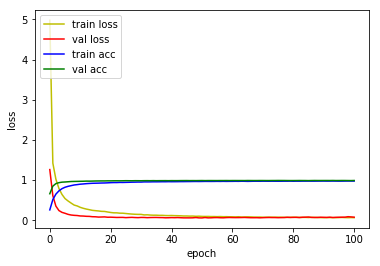

10000/10000 [==============================] - 1s 117us/sample - loss: 0.0425 - acc: 0.9910
Loss: 0.04253646352121232 Accuracy: 0.991



In [11]:
for i in range(1, 6):
    base = 'vis_2D_CNN_custom_ch_16_DO_075_DO'
    model_name = base+'_{}_conv'.format(i)
    model = build_2d_cnn_custom_ch_16_DO(conv_num=i)
#         model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4),
          metrics=['accuracy'])
    model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
    os.makedirs(model_path, exist_ok=True)
    model_filename = model_path+'{epoch:03d}-{val_loss:.4f}.hdf5'
    checkpointer = ModelCheckpoint(filepath = model_filename, monitor = "val_loss", 
                                   verbose=1, save_best_only=True)

    early_stopping = EarlyStopping(monitor='val_loss', patience=50)
    hist = model.fit(x_train, y_train, batch_size=64, epochs=500, 
                     validation_data=[x_val, y_val], shuffle=True, 
                     callbacks = [checkpointer, early_stopping])

    print()
    print(model_name, 'Model')
    fig, ax = plt.subplots()
    ax.plot(hist.history['loss'], 'y', label='train loss')
    ax.plot(hist.history['val_loss'], 'r', label='val loss')
    ax.plot(hist.history['acc'], 'b', label='train acc')
    ax.plot(hist.history['val_acc'], 'g', label='val acc')
    ax.set_xlabel('epoch')
    ax.set_ylabel('loss')
    ax.legend(loc='upper left')
    plt.show()

    png_path = 'visualization/learning_curve/'
    filename = model_name+'.png'
    os.makedirs(png_path, exist_ok=True)
    fig.savefig(png_path+filename, transparent=True)

    model.save(model_path+'000_last.hdf5')
    del(model)

    model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
    model_filename = model_path + sorted(os.listdir(model_path))[-1]
    model = load_model(model_filename)
    [loss, accuracy] = model.evaluate(x_test, y_test)
    print('Loss:', loss, 'Accuracy:', accuracy)
    print()

    del(model)

In [12]:
log_dir = 'log'
os.makedirs(log_dir, exist_ok=True)
base = 'vis_2D_CNN_custom_ch_16_DO_075_DO'

with open(path.join(log_dir, base), 'w') as log_file:
    for i in range(1, 6):
        model_name = base+'_{}_conv'.format(i)
        print()
        print(model_name, 'Model')
        model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
        model_filename = model_path + sorted(os.listdir(model_path))[-1]

        model = load_model(model_filename)
        model.summary()

        [loss, accuracy] = model.evaluate(x_test, y_test)
        print('Loss:', loss, 'Accuracy:', accuracy)

        del(model)

        log_file.write('\t'.join([model_name, str(accuracy), str(loss)])+'\n')


vis_2D_CNN_custom_ch_16_DO_075_DO_1_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
activation_15 (Activation)   (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 3136)              0         
_________________________________________________________________
dense_5 (Dense)             

10000/10000 [==============================] - 1s 134us/sample - loss: 0.0425 - acc: 0.9910
Loss: 0.04253646352121232 Accuracy: 0.991


In [7]:
for i in range(1, 6):
    model_name = base+'_{}_conv'.format(i)
    print()
    print(model_name, 'Model')
    model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
    model_filename = model_path + '000_last.hdf5'

    model = load_model(model_filename)
    model.summary()

    [loss, accuracy] = model.evaluate(x_test, y_test)
    print('Loss:', loss, 'Accuracy:', accuracy)

    del(model)


vis_2D_CNN_custom_ch_16_DO_075_DO_1_conv Model
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
activation_15 (Activation)   (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 3136)              0 

NameError: name 'x_test' is not defined